In [95]:
import pandas as pd
import numpy as np
import seaborn as sns

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
data = {
    'tecrube': [0.5, 0, 1, 5, 8, 4, 15, 7, 3, 2, 12, 10, 14, 6],
    'maas': [2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]
}

df = pd.DataFrame(data)

print(df)


    tecrube   maas
0       0.5   2500
1       0.0   2250
2       1.0   2750
3       5.0   8000
4       8.0   9000
5       4.0   6900
6      15.0  20000
7       7.0   8500
8       3.0   6000
9       2.0   3500
10     12.0  15000
11     10.0  13000
12     14.0  18000
13      6.0   7500


In [98]:
df.head()

,tecrube,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [99]:
df.shape

(14, 2)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tecrube  14 non-null     float64
 1   maas     14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes


In [101]:
#istatiksel değerleri görüntüleme
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tecrube,14.0,6.250000,4.979767,0.0,2.25,5.5,9.5,15.0
maas,14.0,8778.571429,5733.495185,2250.0,4125.00,7750.0,12000.0,20000.0


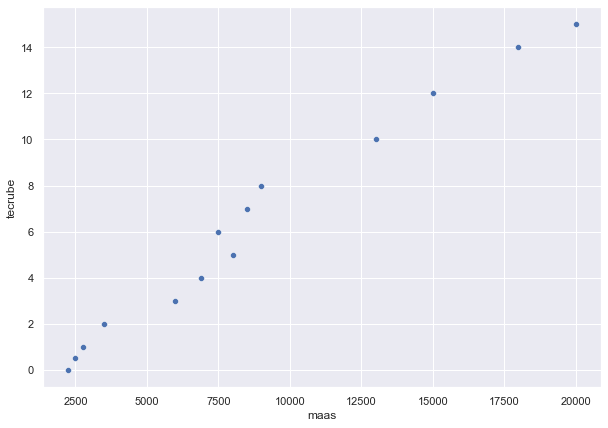

In [102]:
sns.set(rc={"figure.figsize":(10,7)})
sns.scatterplot(x=df["maas"] , y= df["tecrube"]);

In [103]:
df.corr()

,tecrube,maas
tecrube,1.0000,0.9887
maas,0.9887,1.0000


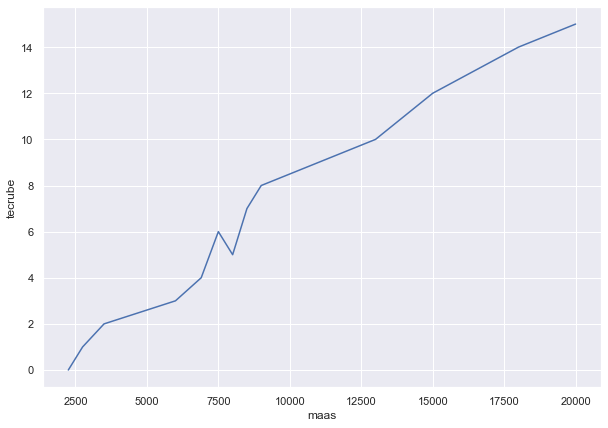

In [104]:
sns.lineplot(x=df["maas"] , y=df["tecrube"]);

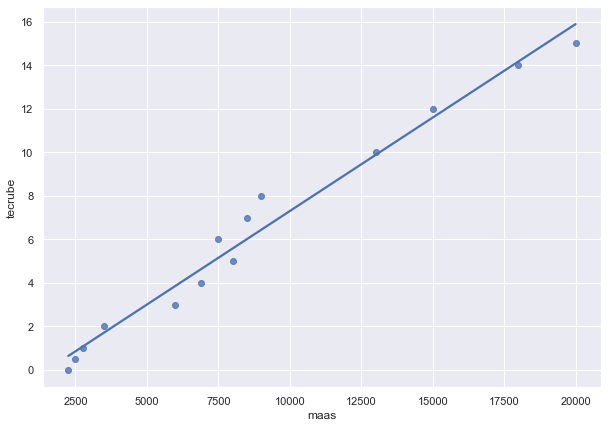

In [105]:
sns.regplot(x=df["maas"] , y=df["tecrube"] , ci=None);

In [106]:
from sklearn.linear_model import LinearRegression
linear_regresyon = LinearRegression()

In [107]:
X = df.drop("maas" , axis=1)

In [108]:
y = df["maas"]

In [109]:
X

,tecrube
0,0.5
1,0.0
2,1.0
3,5.0
4,8.0
5,4.0
6,15.0
7,7.0
8,3.0
9,2.0


In [110]:
y

0      2500
1      2250
2      2750
3      8000
4      9000
5      6900
6     20000
7      8500
8      6000
9      3500
10    15000
11    13000
12    18000
13     7500
Name: maas, dtype: int64

In [111]:
linear_regresyon.fit(X,y)

LinearRegression()

In [112]:
linear_regresyon.predict([[3]])

array([5078.9397884])

In [113]:
dir(linear_regresyon)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

## y=ax+b

In [114]:
#a
linear_regresyon.coef_

array([1138.34819698])

In [115]:
3*1138.34819698

3415.04459094

In [116]:
#b
linear_regresyon.intercept_

1663.895197474103

In [117]:
3415.04459094 + 1663.895197474103


5078.9397884141035

In [118]:
# y = 1138.34819698 * x + 1663.895197474103

In [119]:
katsayi = linear_regresyon.coef_
sabit = linear_regresyon.intercept_

def maasTahmin(tecrube):
    maas = tecrube*katsayi+sabit
    return maas

In [120]:
maasTahmin(5)

array([7355.63618235])

In [121]:
linear_regresyon.predict([[5]])

array([7355.63618235])

In [122]:
df["tahminMaas"] = linear_regresyon.predict(X)
df

,tecrube,maas,tahminMaas
0,0.5,2500,2233.069296
1,0.0,2250,1663.895197
2,1.0,2750,2802.243394
3,5.0,8000,7355.636182
4,8.0,9000,10770.680773
5,4.0,6900,6217.287985
6,15.0,20000,18739.118152
7,7.0,8500,9632.332576
8,3.0,6000,5078.939788
9,2.0,3500,3940.591591


In [123]:
df["maas_tahminMaas_fark"] = df["maas"] - df["tahminMaas"]

In [124]:
df

,tecrube,maas,tahminMaas,maas_tahminMaas_fark
0,0.5,2500,2233.069296,266.930704
1,0.0,2250,1663.895197,586.104803
2,1.0,2750,2802.243394,-52.243394
3,5.0,8000,7355.636182,644.363818
4,8.0,9000,10770.680773,-1770.680773
5,4.0,6900,6217.287985,682.712015
6,15.0,20000,18739.118152,1260.881848
7,7.0,8500,9632.332576,-1132.332576
8,3.0,6000,5078.939788,921.060212
9,2.0,3500,3940.591591,-440.591591


In [125]:
df["farkınKaresi"] = df["maas_tahminMaas_fark"]**2

In [126]:
df["farkınKaresi"] .sum()/14

685945.8459614947

In [127]:
#MSE
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df["maas"] , df["tahminMaas"])
MSE

685945.8459614947

In [128]:
#RMSE

import math

RMSE = math.sqrt(MSE)
RMSE

828.2184771915528

In [129]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(df["maas"] , df["tahminMaas"])
MAE

680.1833490278625

In [130]:
df

,tecrube,maas,tahminMaas,maas_tahminMaas_fark,farkınKaresi
0,0.5,2500,2233.069296,266.930704,7.125200e+04
1,0.0,2250,1663.895197,586.104803,3.435188e+05
2,1.0,2750,2802.243394,-52.243394,2.729372e+03
3,5.0,8000,7355.636182,644.363818,4.152047e+05
4,8.0,9000,10770.680773,-1770.680773,3.135310e+06
5,4.0,6900,6217.287985,682.712015,4.660957e+05
6,15.0,20000,18739.118152,1260.881848,1.589823e+06
7,7.0,8500,9632.332576,-1132.332576,1.282177e+06
8,3.0,6000,5078.939788,921.060212,8.483519e+05
9,2.0,3500,3940.591591,-440.591591,1.941210e+05
